In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math

In [2]:
## Read in the data
df = pd.read_excel("vib_ssr_data.xlsx", dtype = object) #raw data
print(df.shape)
df.head()

(224, 251)


,MClade.,Subclade.,Genus.,Species.,Number.,Sample.,VD003,VD003.1,VD003.2,VD003.3,...,VR028,VR028.1,VR028.2,VR028.3,VR028.4,VR043,VR043.1,VR043.2,VR043.3,VR043.4
0,Laminotinus,Lobata,Viburnum,acerifolium,1,20_Vace_1,140,NaN,NaN,NaN,...,**,NaN,NaN,NaN,NaN,275,NaN,NaN,NaN,NaN
1,Laminotinus,Lobata,Viburnum,acerifolium,2,20_Vace_2,130,NaN,NaN,NaN,...,**,NaN,NaN,NaN,NaN,276,NaN,NaN,NaN,NaN
2,Laminotinus,Lobata,Viburnum,acerifolium,3,20_Vace_3,125,139,NaN,NaN,...,**,NaN,NaN,NaN,NaN,276,284,NaN,NaN,NaN
3,Laminotinus,Sambucina,Viburnum,beccarii,4,20_Vbec_1,90,94,100,105,...,**,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Laminotinus,Sambucina,Viburnum,beccarii,5,20_Vbec_2,88,94,102,105,...,**,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['Species.'].unique()

array(['acerifolium', 'beccarii', 'betulifolium', 'bracteatum',
       'carlesii', 'cassinoides', 'clemensiae', 'coriaceum',
       'costaricanum', 'cylindricum', 'davidii', 'dentatum', 'dilatatum',
       'ellipticum', 'farreri', 'furcatum', 'hartwegii', 'inopinatum',
       'kansuense', 'lantanoides', 'lepidotulum', 'lutescens',
       'macrocephalum', 'molle', 'odoratissimum', 'opulus', 'orientale',
       'plicatum', 'propinquum', 'prunifolium', 'punctatum', 'recognitum',
       'rufidulum', 'sambucinum', 'sargentii', 'schensianum', 'setigerum',
       'sieboldii', 'sympodiale', 'taiwanianum', 'ternatum', 'tinus',
       'tinoides', 'trilobum', 'triphyllum', 'urceolatum', 'unknown',
       'moschatellina', 'nigra', 'canadensis', 'hybrida', 'japonica',
       'maackii'], dtype=object)

In [4]:
# number of viburnum species (there's 7 species outside of Viburnum)
len(df['Species.'].unique())-7

46

In [5]:
## Make a list of all of the subclades
# This list is in order of relationship (mirrors the phylogenetic tree order)
# Excludes the single Viburnum sample that the species is unknown

subclades_list = ['Sambucina', 'Coriacea', 'Lobata', 'Succotinus', 'Opulus', 'Orienotinus', 'Dentata', \
                 'Mollotinus', 'Tinus', 'Lentago', 'Punctata', 'Euviburnum', 'Solenotinus', 'Lutescentia',\
                 'Pseudotinus', 'Urceolata', 'clemensiae', 'Viburnaceae', 'Caprifoliaceae']

In [7]:
## Make a filter to only get the first column of each markerset

bools_mrk = df.columns.str.contains('.', regex = False)

In [8]:
### Function to find amplification frequency across clades. Can be major clade or subclade

## options:
# rank
    # subclade
    # major_clade
    # all
    # species
# clade
    # names of whatever rank you want to find the amp frequency for
    # will be run through the for loop
# specificity:
    # int (frequency of successful amplifications) 
    # str (frequency of out of range amplifications)

def find_amp(rank, clade, specificity):
    
    amp_freq = []
    
    if rank == 'subclade':
        clade_df = df[df['Subclade.'] == clade].loc[:,bools_mrk == False]
        
        for col in clade_df.columns:

            worked = 0
            for index in clade_df.iloc[:,0].index:
                if isinstance(clade_df[col][index], specificity):
                    worked += 1
            amp_freq.append(worked/len(clade_df))
        return amp_freq
   


    if rank == 'major_clade':
        clade_df = df[df['MClade.'] == clade].loc[:,bools_mrk == False]
        
        for col in clade_df.columns:

            worked = 0
            for index in clade_df.iloc[:,0].index:
                if isinstance(clade_df[col][index], specificity):
                    worked += 1
            amp_freq.append(worked/len(clade_df))
        return amp_freq
    
    
    
    if rank == 'all':
        clade_df = df.loc[:,bools_mrk == False]
        
        for col in clade_df.columns:

            worked = 0
            for index in clade_df.iloc[:,0].index:
                if isinstance(clade_df[col][index], specificity):
                    worked += 1
            amp_freq.append(worked/len(clade_df))
        return amp_freq
    
    if rank == 'species':
        clade_df = df[df['Species.'] == clade].loc[:,bools_mrk == False]
        
        for col in clade_df.columns:

            worked = 0
            for index in clade_df.iloc[:,0].index:
                if isinstance(clade_df[col][index], specificity):
                    worked += 1
            amp_freq.append(worked/len(clade_df))
        return amp_freq

In [9]:
## Find the in expected range amplification frequency for all subclades

amp = []

for c in subclades_list:
    amp.append(find_amp('subclade', c, int))
    
amp_df = pd.DataFrame(amp, columns = df.loc[:,bools_mrk == False].columns)

amp_df.index = subclades_list

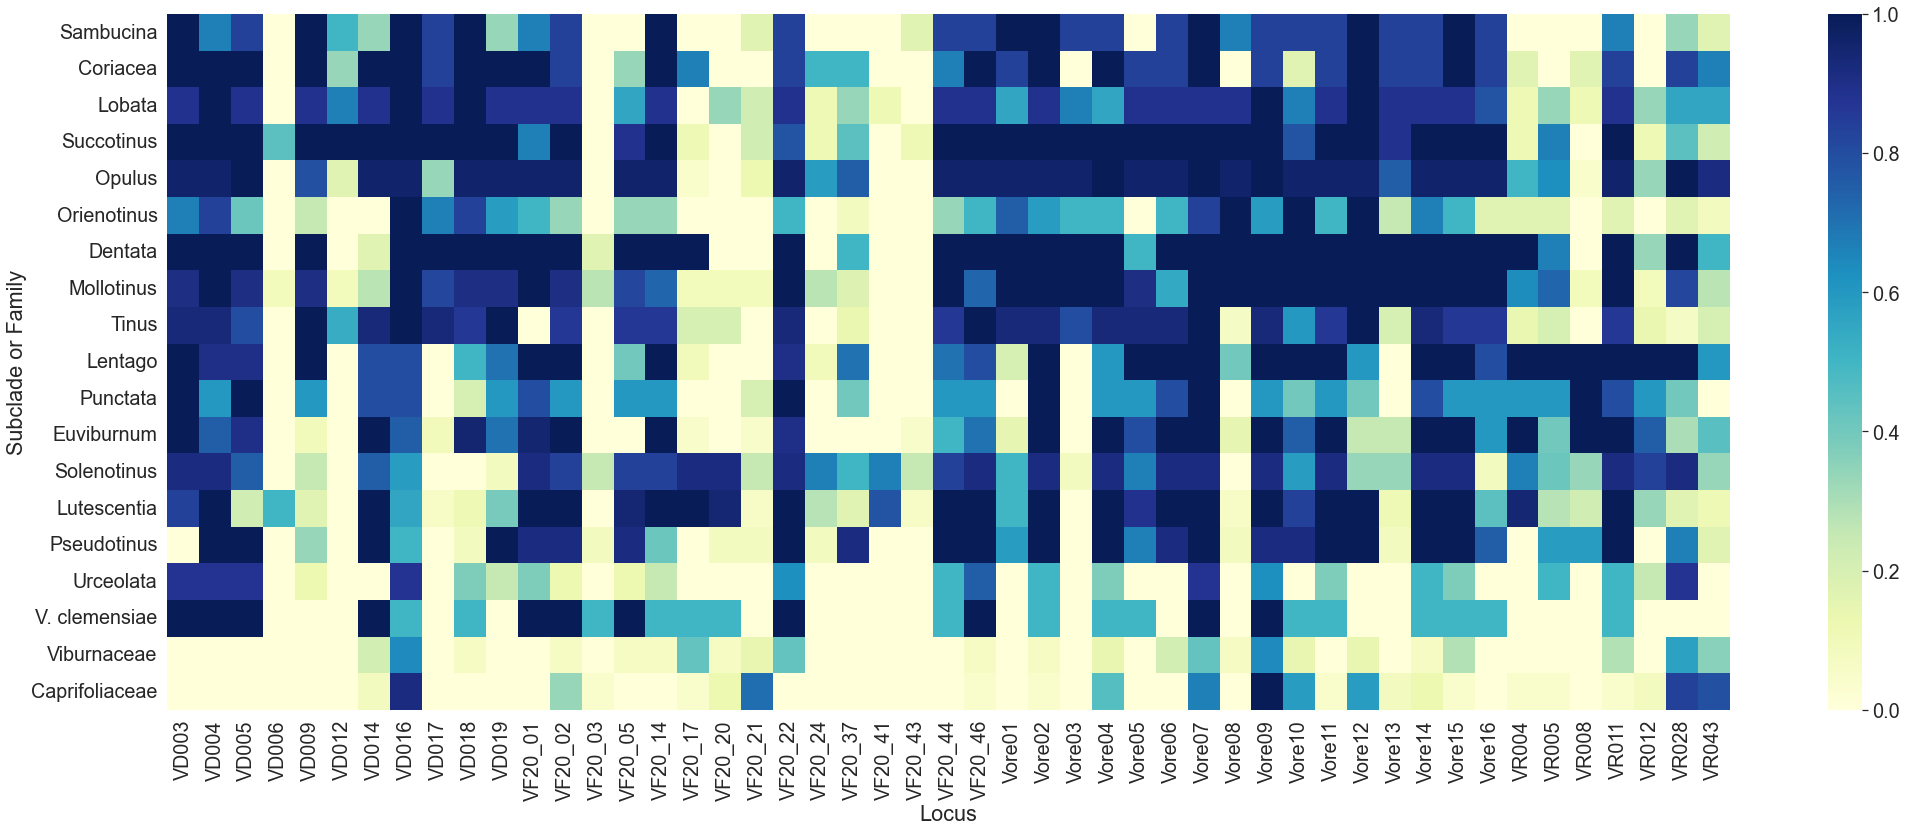

In [10]:
# Heat map of in range amplification

tick_mark_subclades = ['Sambucina', 'Coriacea', 'Lobata', 'Succotinus', 'Opulus', 'Orienotinus', 'Dentata', \
                 'Mollotinus', 'Tinus', 'Lentago', 'Punctata', 'Euviburnum', 'Solenotinus', 'Lutescentia',\
                 'Pseudotinus', 'Urceolata', 'V. clemensiae', 'Viburnaceae', 'Caprifoliaceae']

sns.set(font_scale=1.8)
plt.figure(figsize = (30,12))
ax = sns.heatmap(amp_df, cmap="YlGnBu", yticklabels = tick_mark_subclades)
ax.set(xlabel = 'Locus', ylabel = 'Subclade or Family')
plt.tight_layout()
plt.savefig("in_range_amp_all.tiff", dpi = 600)

In [11]:
## Make a list of the marker names

names = df.iloc[:,6:].columns.str.replace(r'\.[1-4]', '')
len(names.unique())

/var/folders/jt/t0jwd3cj3nq98rldtwwb71r80000gn/T/ipykernel_58824/825195629.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  names = df.iloc[:,6:].columns.str.replace(r'\.[1-4]', '')


49

In [12]:
## Function to find the frequency of spurious amplification
## options
# locus
    # name of the marker
# df
    # dataframe to iterate through

def spurious_freq(locus, df):
    count = 0

    filter_col = [col for col in df if col.startswith(locus)]
    
    for row in df[filter_col].iterrows():
        for cell in row[1]:
            if isinstance(cell, str):
                count += 1
                break

    return round((count/df.shape[0])*100, 2)

In [13]:
## Find the percent of spurious amplification for each marker

spurious = []

for locus in names.unique():
    spurious.append(spurious_freq(locus, df))
    
    
exp_amp = find_amp('all', 'clade', int)
exp_amp_percent = np.array(exp_amp)*100

spurious_df = pd.DataFrame(spurious, names.unique(), columns = ['Spurious Amplifications'])
spurious_df['Expected Amplifications'] = exp_amp_percent

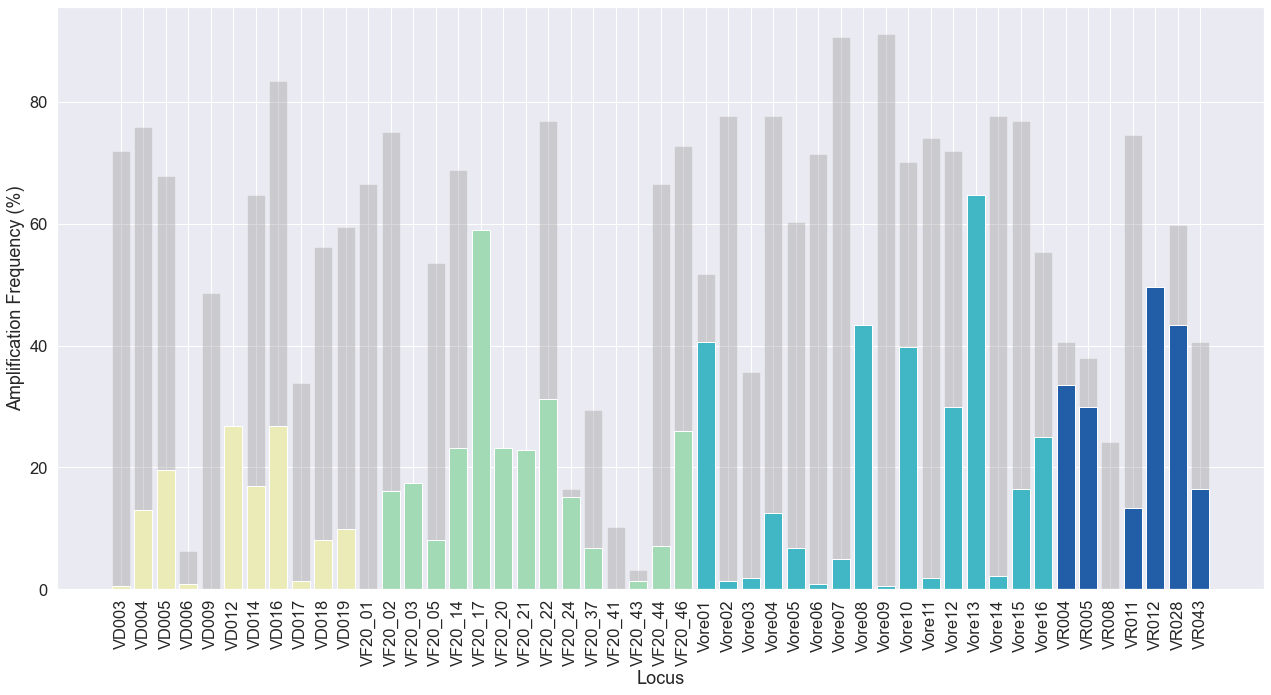

In [14]:
## plot the percentage of expected and spurious banding for each marker

colors = ["#ebebb7", ]*11 + ["#a1dab4", ]*15 + ["#41b6c4", ]*16 + ["#225ea8", ]*6 +["#225ea8"]

sns.set(font_scale=1.5)
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111)

plt.xticks(rotation = 90)
ax.set(xlabel = 'Locus', ylabel = 'Amplification Frequency (%)')
ax.bar(spurious_df.index, spurious_df['Expected Amplifications'], color = 'grey', alpha = 0.3)
ax.bar(spurious_df.index, spurious_df['Spurious Amplifications'], color = colors)
plt.tight_layout()
plt.savefig("expected_and_spurious.tiff", dpi = 600)

In [15]:
# Make a filter for only the comprehensive markers
comp_mrk = 'VD003|VD004|VD014|VD016|VF20_01|VF20_02|VF20_22|Vore02|Vore04|Vore07|Vore14|Vore15|VR004|VR011'
comp_bools_mrk = df.columns.str.contains(comp_mrk)

In [16]:
# Function to find the amplification rates for the comprehensive markers. Can be across subclade, major_clade, or species

## Options
# rank (determines which column it filters through)
    # subclade
    # major_clade
    # species
# clade
    # names of the subclade/major_clade/species to generate amplification frequencies for
# specificity
    # int (frequency of successful/in range amplifications) 
    # str (frequency of out of range amplifications)
    
def find_comp_amp(rank, clade, specificity):

    amp_freq = []
    
    if rank == 'subclade':
        
        clade_df = df[df['Subclade.'] == clade].loc[:,(bools_mrk == False) & (comp_bools_mrk)]

        for col in clade_df.columns:

            worked = 0
            for index in clade_df.iloc[:,0].index:
                if isinstance(clade_df[col][index], specificity):
                    worked += 1
            amp_freq.append(worked/len(clade_df))
        return amp_freq

    
    
    if rank == 'major_clade':
        
        clade_df = df[df['MClade.'] == clade].loc[:,(bools_mrk == False) & (comp_bools_mrk)]

        for col in clade_df.columns:

            worked = 0
            for index in clade_df.iloc[:,0].index:
                if isinstance(clade_df[col][index], specificity):
                    worked += 1
            amp_freq.append(worked/len(clade_df))
        return amp_freq
    
   

    if rank == 'species':
        
        clade_df = df[df['Species.'] == clade].loc[:,(bools_mrk == False) & (comp_bools_mrk)]

        for col in clade_df.columns:

            worked = 0
            for index in clade_df.iloc[:,0].index:
                if isinstance(clade_df[col][index], specificity):
                    worked += 1
            amp_freq.append(worked/len(clade_df))
        return amp_freq

In [17]:
# Find in range amplification for all comprehensive markers across all subclades

comp_amp = []

for c in subclades_list:
    comp_amp.append(find_comp_amp('subclade', c, int))
    
comp_amp_df = pd.DataFrame(comp_amp, columns = df.loc[:,(bools_mrk == False) & (comp_bools_mrk)].columns)

comp_amp_df.index = subclades_list

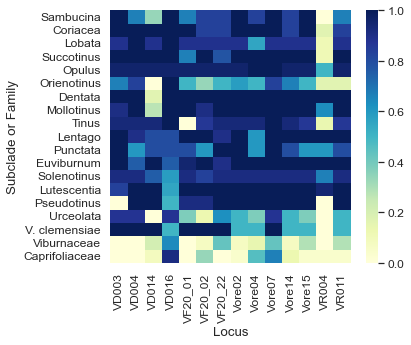

In [18]:
# Heat map of in range amplification for comprehensive markers and all subclades

sns.set(font_scale=1.1)
plt.figure(figsize = (6,5))
h = sns.heatmap(comp_amp_df, cmap="YlGnBu", yticklabels = tick_mark_subclades)
h.set(xlabel = 'Locus', ylabel = 'Subclade or Family')
plt.tight_layout()
plt.savefig("in_range_amp_comp_mrk.tiff", dpi = 600)

In [19]:
# find the amplification frequency for the proof of concept species

species = ['carlesii', 'opulus', 'plicatum', 'tinus']
outgroup = ['Viburnaceae', 'Caprifoliaceae']

species_amp = []

for s in species:
    species_amp.append(find_comp_amp('species', s, int))
    
species_amp_df = pd.DataFrame(species_amp, columns = df.loc[:,(bools_mrk == False) & (comp_bools_mrk)].columns)
species_amp_df.index = species


comp_out_amp = []

for c in outgroup:
    comp_out_amp.append(find_comp_amp('subclade', c, int))
    
comp_out_amp_df = pd.DataFrame(comp_out_amp, columns = df.loc[:,(bools_mrk == False) & (comp_bools_mrk)].columns)
comp_out_amp_df.index = outgroup


species_out_comp_amp_df = pd.concat([species_amp_df, comp_out_amp_df]) 

In [20]:
# output it into an excel sheet
species_out_comp_amp_df.to_excel('proof_of_concept_updated.xlsx')

In [21]:
## function to calculate the observed heterozygosity for individual species and comprehensive markers

## Options
# species
    # name of species observed heterozygosity should be calculated for

def find_Ho_species(species):

    amp_count = []
    Ho_count = []
    
    clade_df = df[df['Species.'] == species].loc[:,(bools_mrk == False) & (comp_bools_mrk)]

    for col in clade_df.columns:

        worked = 0
        for index in clade_df.iloc[:,0].index:
            if isinstance(clade_df[col][index], int):
                worked += 1
        amp_count.append(worked)
        
    
    
    col2 = df.columns.str.contains('.1', regex = False)
    
    Ho_df = df[df['Species.'] == species].loc[:,(col2) & (comp_bools_mrk)]

    for col in Ho_df.columns:

        Ho = 0
        for index in Ho_df.iloc[:,0].index:
            if isinstance(Ho_df[col][index], int):
                Ho += 1
        Ho_count.append(Ho)
    

    return np.array(Ho_count)/np.array(amp_count)

In [22]:
# function to find observed heterozygosity for comprehensive markers and outgroup species
# easier to do it this way because all outgroup species were put as being in Viburnaceae or Caprifoliaceae in 'Subclade.' column

def find_Ho(clade):

    amp_count = []
    Ho_count = []
    
    clade_df = df[df['Subclade.'] == clade].loc[:,(bools_mrk == False) & (comp_bools_mrk)]

    for col in clade_df.columns:

        worked = 0
        for index in clade_df.iloc[:,0].index:
            if isinstance(clade_df[col][index], int):
                worked += 1
        amp_count.append(worked)
        
    
    
    col2 = df.columns.str.contains('.1', regex = False)
    
    Ho_df = df[df['Subclade.'] == clade].loc[:,(col2) & (comp_bools_mrk)]

    for col in Ho_df.columns:

        Ho = 0
        for index in Ho_df.iloc[:,0].index:
            if isinstance(Ho_df[col][index], int):
                Ho += 1
        Ho_count.append(Ho)
    

    return np.array(Ho_count)/np.array(amp_count)

In [23]:
# Build the dataframe for observed heterozygosity for all proof of concept species and outgroup species
Ho_freq_comp = []

for s in species:
    Ho_freq_comp.append(find_Ho_species(s))
    
Ho_comp_df = pd.DataFrame(Ho_freq_comp, columns = df.loc[:,(bools_mrk == False) & (comp_bools_mrk)].columns)
Ho_comp_df.index = species


comp_out_Ho = []

for c in outgroup:
    comp_out_Ho.append(find_Ho(c))
    
comp_out_Ho_df = pd.DataFrame(comp_out_Ho, columns = df.loc[:,(bools_mrk == False) & (comp_bools_mrk)].columns)
comp_out_Ho_df.index = outgroup


species_out_comp_Ho_df = pd.concat([Ho_comp_df, comp_out_Ho_df]) 

/var/folders/jt/t0jwd3cj3nq98rldtwwb71r80000gn/T/ipykernel_58824/1204623003.py:33: RuntimeWarning: invalid value encountered in true_divide
  return np.array(Ho_count)/np.array(amp_count)
/var/folders/jt/t0jwd3cj3nq98rldtwwb71r80000gn/T/ipykernel_58824/1945030416.py:32: RuntimeWarning: invalid value encountered in true_divide
  return np.array(Ho_count)/np.array(amp_count)


In [24]:
# Output it to an excel sheet

species_out_comp_Ho_df.to_excel('Ho_proof_of_concept.xlsx')

In [25]:
## For Table 1; calculate amplification perentages for each marker set and subclade

In [26]:
# Function to 

## Options
# rank (determines which column it filters through)
    # subclade
    # major_clade
    # genus
    # all
# clade
    # names of the subclade/major_clade/species to generate amplification frequencies for
# marker
    # what the marker starts with; could do full marker i.e., VD004 if you just wanted a calculation for that one marker
    # or could do VD, VF, etc.
# specificity
    # int (frequency of successful/in range amplifications) 
    # str (frequency of out of range amplifications)

def find_amp_mrk(rank, clade, marker, specificity):

    marker_bool = df.columns.str.contains(marker)
    
    amp_freq = []
    
    if rank == 'subclade':
        
        clade_df = df[df['Subclade.'] == clade].loc[:,(bools_mrk == False) & (marker_bool)]

        worked = 0
        
        for col in clade_df.columns:

            for index in clade_df.iloc[:,0].index:
                if isinstance(clade_df[col][index], specificity):
                    worked += 1
        amp_freq.append(worked/(len(clade_df.columns)*len(clade_df)))
        return amp_freq
 

    if rank == 'major_clade':
        
        clade_df = df[df['MClade.'] == clade].loc[:,(bools_mrk == False) & (marker_bool)]

        worked = 0
        
        for col in clade_df.columns:

            for index in clade_df.iloc[:,0].index:
                if isinstance(clade_df[col][index], specificity):
                    worked += 1
        amp_freq.append(worked/(len(clade_df.columns)*len(clade_df)))
        return amp_freq
    
    
    if rank == 'genus':
        
        clade_df = df[df['Genus.'] == clade].loc[:,(bools_mrk == False) & (marker_bool)]

        worked = 0
        
        for col in clade_df.columns:

            for index in clade_df.iloc[:,0].index:
                if isinstance(clade_df[col][index], specificity):
                    worked += 1
        amp_freq.append(worked/(len(clade_df.columns)*len(clade_df)))
        return amp_freq
    
    
    if rank == 'all':
        
        clade_df = df.loc[:,(bools_mrk == False) & (marker_bool)]

        worked = 0
        
        for col in clade_df.columns:

            for index in clade_df.iloc[:,0].index:
                if isinstance(clade_df[col][index], specificity):
                    worked += 1
        amp_freq.append(worked/(len(clade_df.columns)*len(clade_df)))
        return amp_freq
        

In [27]:
# Make the dataframe of amplification percentages per markerset per subclade

table_1_subclades = ['Lentago', 'Punctata', 'Euviburnum', 'Solenotinus', 'Lutescentia', 'Succotinus', 'Lobata', \
                    'Coriacea', 'Sambucina', 'Mollotinus', 'Dentata', 'Orienotinus', 'Pseudotinus', 'Urceolata', \
                    'Opulus', 'Tinus', 'clemensiae', 'Viburnaceae', 'Caprifoliaceae']
marker_sets = ['VD', 'VF', 'Vore', 'VR']

all_mrk = []

for mrk in marker_sets:

    for s in table_1_subclades:
        all_mrk.append(find_amp_mrk('subclade', s, mrk, int))

all_mrk = np.reshape(all_mrk, (4, 19))
all_mrk_df = pd.DataFrame(all_mrk, columns = table_1_subclades)

In [28]:
# Export to excel

all_mrk_df.transpose().to_excel("table_1.xlsx")

In [29]:
## Overall Marker success across all samples and markers
find_amp_mrk('all', 'clade', 'V', int)

[0.520317055393586]

In [30]:
## Marker success across viburnum samples and all markers
find_amp_mrk('genus', 'Viburnum', 'V', int)

[0.5974325213956551]

In [31]:
## Marker success across outgroup species and all markers
find_amp_mrk('genus', 'Other', 'V', int)

[0.14285714285714285]

In [32]:
## Marker success across all samples and comprehensive markers
find_amp_mrk('all','clade', comp_mrk, int)

[0.7356505102040817]

In [33]:
## Marker success across viburnum samples and comprehensive markers
find_amp_mrk('genus', 'Viburnum', comp_mrk, int)

[0.8463901689708141]

In [34]:
## Marker success across outgroup samples and comprehensive markers
find_amp_mrk('genus', 'Other', comp_mrk, int)

[0.19360902255639098]

In [35]:
### Marker success expected size across the different markersets
## VD
VD = find_amp_mrk('all','clade', 'VD', int)
VF = find_amp_mrk('all', 'clade', 'VF', int)
Vore = find_amp_mrk('all', 'clade', 'Vore', int)
VR = find_amp_mrk('all', 'clade', 'VR', int)

print(str(VD)+str(VF)+str(Vore)+str(VR))

[0.5304383116883117][0.40148809523809526][0.6604352678571429][0.4387755102040816]
